In [27]:
import jax.numpy as np
import scipy
from dLux.utils import arcsec2rad
import matplotlib.pyplot as plt


In [28]:
def UD_vis2(wavel, diam, u=None, v=None, baseline=None):
    """
    Calculate the squared visibility at a given u, v coord
    or baseline for a uniform disk source morphology.
    
    See Table 1
    https://ui.adsabs.harvard.edu/abs/2007NewAR..51..576B
    
    Parameters
    ----------
    wavel : float, nanometres
        Wavelength in nm.
    diam : float, radians
        Diameter of the uniform disk in radians.
    u : float, m
        u coordinate in meters.
    v : float, m
        v coordinate in meters.
    baseline : float, m
        Baseline length in meters. If specified u and v are ignored.

    Returns
    -------
    vis2 : float
        Squared visibility.
    """
    if baseline is None:
        baseline = np.sqrt(u**2 + v**2)  # grabbing baseline length

    wavel *= 1e-9  # nm -> m 
    A = np.pi * diam * baseline / wavel
    return (2 * scipy.special.j1(A) / A) ** 2


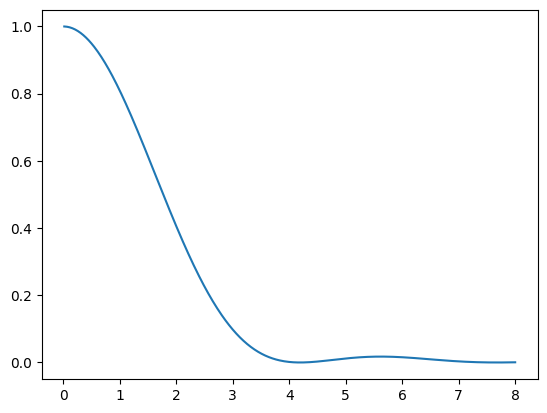

In [35]:
bs = np.linspace(0, 8, 500)
wl = 750  # nm
diam = arcsec2rad(45e-3)  # radians

plt.plot(bs, UD_vis2(wavel=wl, diam=diam, baseline=bs))
plt.show()

In [36]:
def GD_vis2(wavel, sigma, u=None, v=None, baseline=None):
    """
    Calculate the squared visibility at a given u, v coord
    or baseline for a Gaussian disk source morphology.

    See Table 1
    https://ui.adsabs.harvard.edu/abs/2007NewAR..51..576B
    
    Parameters
    ----------
    wavel : float, nanometres
        Wavelength in nm.
    sigma : float, radians
        Standard deviation of the Gaussian disk in radians.
    u : float, m
        u coordinate in meters.
    v : float, m
        v coordinate in meters.
    baseline : float, m
        Baseline length in meters. If specified u and v are ignored.

    Returns
    -------
    vis2 : float
        Squared visibility.
    """
    if baseline is None:
        baseline = np.sqrt(u**2 + v**2)  # grabbing baseline length
    FWHM = 2 * np.sqrt(2 * np.log(2)) * sigma  # FWHM in radians
    wavel *= 1e-9  # nm -> m 

    return np.exp(-(np.pi * FWHM * baseline / wavel)**2 / (2 * np.log(2) ))

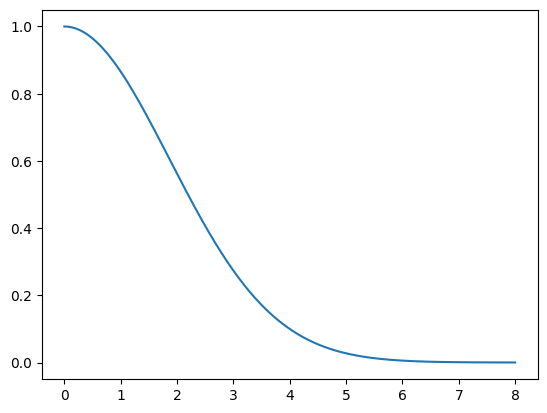

In [38]:
sigma = arcsec2rad(22e-3 / (2 * np.sqrt(2 * np.log(2))))  # radians
plt.plot(bs, GD_vis2(wavel=wl, sigma=sigma, baseline=bs))
plt.show()


In [39]:
def binary_vis2(u, v, wavel, sep, pa, flux_ratio=1):
    """
    Calculate the squared visibility at a given u, v coord
    or baseline for a resolved binary pair.

    See Table 1
    https://ui.adsabs.harvard.edu/abs/2007NewAR..51..576B
    
    Parameters
    ----------
    u : float, m
        u coordinate in meters.
    v : float, m
        v coordinate in meters.
    wavel : float, nanometres
        Wavelength in nm.
    sep : float, degrees
        Angular separation of the binary pair in radians.
    pa : float, radians
        Position angle of the binary pair in radians.
    flux_ratio : float = 1
        Ratio of the flux of the secondary to the primary. Must be between (0, 1].

    Returns
    -------
    vis2 : float
        Squared visibility.
    """
    if flux_ratio > 1 or flux_ratio <= 0:
        raise ValueError('flux_ratio must be between (0, 1].')

    if baseline is None:
        baseline = np.sqrt(u**2 + v**2)  # grabbing baseline length
    
    wavel *= 1e-9  # nm -> m

    # angular separation vector in radians
    rho = np.array([sep * np.sin(pa), sep * np.cos(pa)])
    
    # dot product between baseline vector and angular separation vector
    dot = np.dot(np.array([u, v]), rho)

    return (1 + flux_ratio**2 + 2*flux_ratio*np.cos(2*np.pi / (wavel*dot)) ) / (1 + flux_ratio) ** 2

In [ ]:
sep = arcsec2rad(100e-3)  # radians
pa = np.pi / 6
plt.plot(binary_vis2(wavel=wl, sigma=sigma, baseline=bs))
plt.show()